# **Regularization Normalization and Dropout**

In [2]:
import os
os.chdir("/content/drive/MyDrive/Deep_Learning/regularization_normalizaton")
os.getcwd()

'/content/drive/MyDrive/Deep_Learning/regularization_normalizaton'

In [3]:
!nvidia-smi

Wed Aug  7 05:50:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Importing the Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### Agenda:
1. Early Stopping
2. Data Scaling
3. Dropout
4. Regularization
5. Batch-Normalization
6. Weight Initialization
7. Keras Tuner (Hyperparameter Tuning)

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=250, noise = 0.2, random_state=42)

In [17]:
X.shape

(250, 2)

In [18]:
y.shape

(250,)

<Axes: >

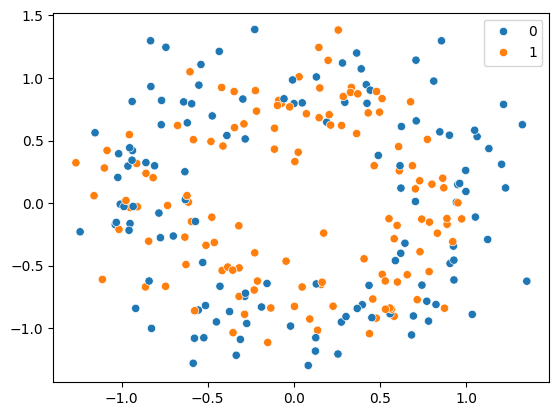

In [19]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

We have introduced some noise

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape[1]

2

In [23]:
X_test.shape

(50, 2)

In [24]:
y_train.shape

(200,)

In [28]:
LAYERS = [
      tf.keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal", input_dim=X.shape[1]),
      tf.keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(1, activation="sigmoid")
]

In [32]:
model = Sequential(LAYERS)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 343 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8239 - loss: 0.4075 - val_accuracy: 0.5800 - val_loss: 1.9007
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.3887 - val_accuracy: 0.5400 - val_loss: 1.8161
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8029 - loss: 0.4264 - val_accuracy: 0.5600 - val_loss: 1.8880
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.4057 - val_accuracy: 0.5400 - val_loss: 1.8515
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8280 - loss: 0.3867 - val_accuracy: 0.5600 - val_loss: 1.9599
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8376 - loss: 0.3932 - val_accuracy: 0.5400 - val_loss: 1.8731
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.4026 - val_accuracy: 0.5600 - val_loss: 1.8647
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8310 - loss: 0.3851 - val_accuracy: 0.5400 - val_loss

We are getting 83% accuracy but validation accuracy is too low, we can definitely say our model overfitted

In [43]:
history.history["loss"]

[0.41269347071647644,
 0.4075626730918884,
 0.4109939932823181,
 0.4130968451499939,
 0.4143597483634949,
 0.40888863801956177,
 0.40885111689567566,
 0.4124284088611603,
 0.40871521830558777,
 0.40792569518089294,
 0.40827643871307373,
 0.42898979783058167,
 0.4114353060722351,
 0.4235551059246063,
 0.41531267762184143,
 0.40679165720939636,
 0.4070625305175781,
 0.4073679745197296,
 0.402756929397583,
 0.40177857875823975,
 0.4048171937465668,
 0.4143184423446655,
 0.4078347682952881,
 0.40270310640335083,
 0.40155792236328125,
 0.40569868683815,
 0.42244431376457214,
 0.432111918926239,
 0.420192152261734,
 0.41212475299835205,
 0.40283501148223877,
 0.4046517312526703,
 0.40164515376091003,
 0.407314270734787,
 0.40231600403785706,
 0.41124385595321655,
 0.4002431035041809,
 0.40338587760925293,
 0.3981282114982605,
 0.3985213339328766,
 0.3997151553630829,
 0.3978021740913391,
 0.3993931710720062,
 0.3999258875846863,
 0.4008408486843109,
 0.39813804626464844,
 0.3977370858192444,

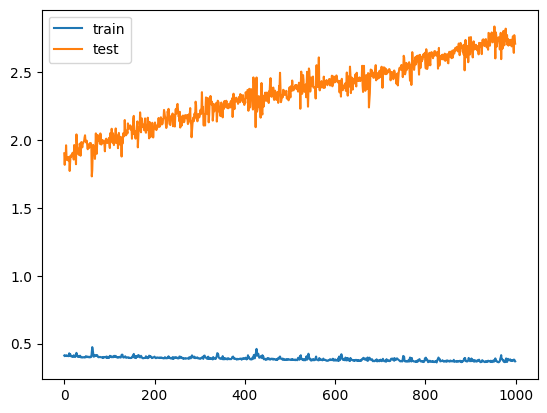

In [45]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

We can see as epochs went, testing loss increased

## **1. Early Stopping**

In [50]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    mode="min",
    baseline = None,
    patience = 20,
    verbose = 1,
    restore_best_weights = False
)

In [51]:
history_with_callback = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=1, callbacks=[callback])

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8356 - loss: 0.3594 - val_accuracy: 0.5600 - val_loss: 2.9138
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.3734 - val_accuracy: 0.5600 - val_loss: 2.8794
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8440 - loss: 0.3509 - val_accuracy: 0.6000 - val_loss: 2.8857
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8448 - loss: 0.3547 - val_accuracy: 0.6000 - val_loss: 2.9356
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8449 - loss: 0.3457 - val_accuracy: 0.5800 - val_loss: 2.8264
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8611 - loss: 0.3321 - val_accuracy: 0.5800 - val_loss: 2.8716
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8474 - loss: 0.3407 - val_accuracy: 0.5800 - val_loss: 2.8909
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8143 - loss: 0.3559 - val_accuracy: 0.5800 - val_loss: 2.87

I stopped just after 31 epochs, lol and gave 83.13% accuracy

We need to play smart with EarlyStopping parameters

## **2. Normalization**

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [55]:
data = df.iloc[:,2:]
data

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


We can see a difference in scale between "Age" and "EstimatedSalary"

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

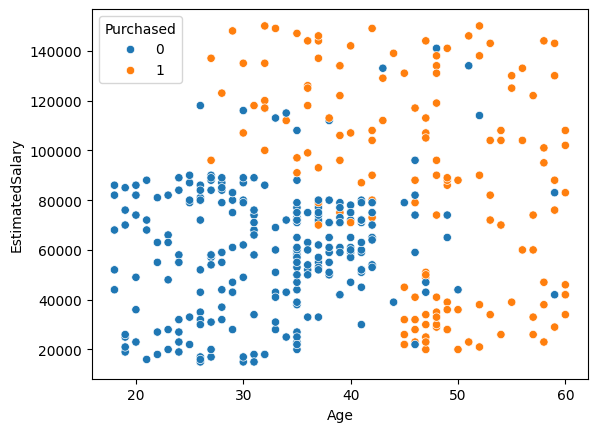

In [57]:
sns.scatterplot(x=data["Age"], y=data["EstimatedSalary"], hue=data["Purchased"])

Too much scattered we cannot find a certain pattern, we won't be getting any better models using Machine Learning, here deep learning is required definitely

In [59]:
X = data.drop("Purchased", axis=1)
y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train.shape

(320, 2)

In [62]:
y_train.shape

(320,)

First we will be passing without any feature scaling

In [63]:
LAYERS = [
      tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal", input_dim=X.shape[1]),
      tf.keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(16, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
      tf.keras.layers.Dense(1, activation="sigmoid")
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
model = Sequential(LAYERS)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
history_without_scaling = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.3493 - loss: 8798.4912 - val_accuracy: 0.3500 - val_loss: 2390.3911
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3499 - loss: 2388.9670 - val_accuracy: 0.3500 - val_loss: 1605.4656
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3585 - loss: 1434.1329 - val_accuracy: 0.3500 - val_loss: 933.9425
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3696 - loss: 758.0726 - val_accuracy: 0.3500 - val_loss: 337.0964
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3696 - loss: 208.3393 - val_accuracy: 0.3500 - val_loss: 37.6133
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4023 - loss: 21.6369 - val_accuracy: 0.6500 - val_loss: 0.6848
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.6842 - val_accuracy: 0.6500 - val_loss: 0.6840
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6312 - loss: 0.6851

Nah, hell nah, just 63%...wtf

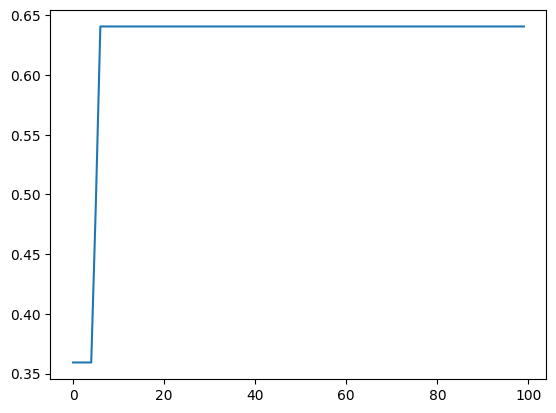

In [67]:
plt.plot(history_without_scaling.history["accuracy"])

Stuck after some epochs

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
history_with_scaling = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), verbose=1, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6539 - loss: 0.6657 - val_accuracy: 0.9000 - val_loss: 0.5429
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8643 - loss: 0.5606 - val_accuracy: 0.9125 - val_loss: 0.4680
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8913 - loss: 0.5074 - val_accuracy: 0.9125 - val_loss: 0.4500
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8884 - loss: 0.5056 - val_accuracy: 0.9125 - val_loss: 0.4524
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9233 - loss: 0.4713 - val_accuracy: 0.9125 - val_loss: 0.3937
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9011 - loss: 0.4118 - val_accuracy: 0.9250 - val_loss: 0.2507
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.3098 - val_accuracy: 0.9375 - val_loss: 0.1787
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9045 - loss: 0.2524 - val_accuracy: 0.9250 -

See after scaling we got more that 91% accuracy, that's too good

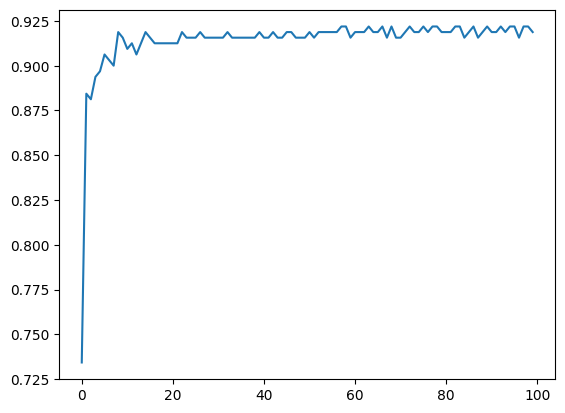

In [73]:
plt.plot(history_with_scaling.history["accuracy"])

Early stopping is definitely required here

In [74]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    mode="min",
    baseline = None,
    patience = 20,
    verbose = 1,
    restore_best_weights = False
)

In [75]:
history_with_scaling_and_callback = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), verbose=1, epochs=100, callbacks=[callback])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9182 - loss: 0.2038 - val_accuracy: 0.9250 - val_loss: 0.2185
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9393 - loss: 0.1715 - val_accuracy: 0.9250 - val_loss: 0.2191
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9076 - loss: 0.2101 - val_accuracy: 0.9250 - val_loss: 0.2216
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9408 - loss: 0.1754 - val_accuracy: 0.9250 - val_loss: 0.2204
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9177 - loss: 0.2045 - val_accuracy: 0.9250 - val_loss: 0.2212
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9295 - loss: 0.1760 - val_accuracy: 0.9250 - val_loss: 0.2178
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9104 - loss: 0.2117 - val_accuracy: 0.9250 - val_loss: 0.2237
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9090 - loss: 0.2012 - val_accuracy: 0.9250 -

We need only 26 epochs to reach 93% accuracy, which is better than previous ones

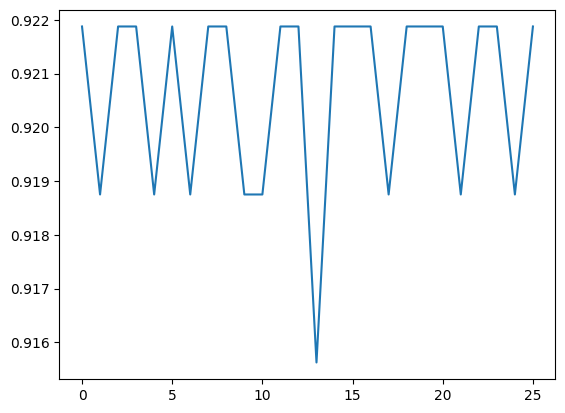

In [76]:
plt.plot(history_with_scaling_and_callback.history["accuracy"])

It kept dancing but EarlyStopping was able to identify where to stop

## **3. Dropout**